In [1]:
from tensorflow.keras.layers import Input , Lambda , Dense , Flatten , Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Resizing all images
IMAGE_SIZE = [224,224]

train_path = '/content/drive/My Drive/Dataset/Dataset/Train'
test_path = '/content/drive/My Drive/Dataset/Dataset/Test'

In [4]:
#Importing the VGG19 
vgg19 = VGG19(input_shape = IMAGE_SIZE +[3] , weights = 'imagenet' , include_top=False )
# [3] is RGB channel imgsize = [224,224,3]
# imagenet is the Dataset from where weights are taken
# include_top = False means discard first and last layer
# first layer we will give out own input size
# last layer we will take our own output

In [5]:
#We dont want to retrain the exisitng weights
for layer in vgg19.layers:
  layer.trainable = False

In [6]:
# To get no. of output classes
folders = glob('/content/drive/My Drive/Dataset/Dataset/Train/*')

In [7]:
#We flatten the last layer from vgg19
x = Flatten()(vgg19.output)

In [8]:
prediction = Dense(len(folders) ,activation = 'softmax' )(x)
# create a model object
model = Model(inputs = vgg19.input ,outputs = prediction ) 

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
13/13 [==============================] - 6s 459ms/step - loss: 1.6773 - accuracy: 0.4904 - val_loss: 1.7881 - val_accuracy: 0.3358
Epoch 2/100
13/13 [==============================] - 6s 436ms/step - loss: 0.8507 - accuracy: 0.6226 - val_loss: 0.5272 - val_accuracy: 0.7239
Epoch 3/100
13/13 [==============================] - 6s 427ms/step - loss: 0.4568 - accuracy: 0.7668 - val_loss: 0.5739 - val_accuracy: 0.6791
Epoch 4/100
13/13 [==============================] - 5s 419ms/step - loss: 0.3938 - accuracy: 0.8245 - val_loss: 0.6141 - val_accuracy: 0.6791
Epoch 5/100
13/13 [==============================] - 5s 418ms/step - loss: 0.3379 - accuracy: 0.8582 - val_loss: 0.4032 - val_accuracy: 0.7761
Epoch 6/100
13/13 [==============================] - 5s 417ms/step - loss: 0.3121 - accuracy: 0.8726 - val_loss: 0.5263 - val_accuracy: 0.7164
Epoch 7/100
13/13 [==============================] - 5s 419ms/step

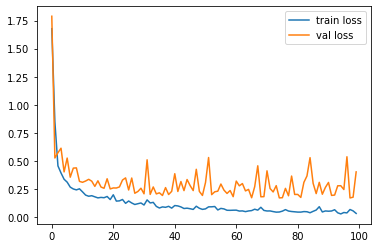

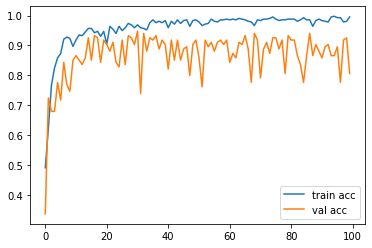

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# To predict new data
from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

img=image.load_img(test_path+'/Uninfected/2.png',target_size=(224,224))

x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
model.predict(img_data)
a=np.argmax(model.predict(img_data), axis=1)
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
